<h1>Contenido<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Taller:-Redes-Neuronales" data-toc-modified-id="Taller:-Redes-Neuronales-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Taller: Redes Neuronales</a></span><ul class="toc-item"><li><span><a href="#Datos-predicción-probabilidad-de-admisión-a-la-universidad" data-toc-modified-id="Datos-predicción-probabilidad-de-admisión-a-la-universidad-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Datos predicción probabilidad de admisión a la universidad</a></span></li><li><span><a href="#Punto-1---Red-Neuronal-de-una-capa" data-toc-modified-id="Punto-1---Red-Neuronal-de-una-capa-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Punto 1 - Red Neuronal de una capa</a></span></li><li><span><a href="#Punto-2---Red-Neuronal-multicapa" data-toc-modified-id="Punto-2---Red-Neuronal-multicapa-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Punto 2 - Red Neuronal multicapa</a></span></li><li><span><a href="#Punto-3----Red-Neuronal-multicapa" data-toc-modified-id="Punto-3----Red-Neuronal-multicapa-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Punto 3  - Red Neuronal multicapa</a></span></li><li><span><a href="#Punto-4---Comparación-y-análisis-de-resultados" data-toc-modified-id="Punto-4---Comparación-y-análisis-de-resultados-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Punto 4 - Comparación y análisis de resultados</a></span></li></ul></li></ul></div>

![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Redes Neuronales

En este taller podrán poner en práctica sus conocimientos sobre la construcción e implementación de redes neuronales de una capa y multicapa. El taller está constituido por 4 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicción probabilidad de admisión a la universidad

En este taller se usará el conjunto de datos de admisiones a una universidad proveniente de la base de datos de Kaggle. Cada observación contiene la probabilidad de que un estudiante sea admitido por la universidad, dadas distintas variables predictoras como el puntaje del examén TOEFL y GRE, el promedio (GPA), entre otras. El objetivo es predecir la probabilidad de admissión de cada estudiante. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/mohansacharya/graduate-admissions).

In [37]:
import warnings
warnings.filterwarnings('ignore')

In [38]:
# Importación librerías
import numpy as np
import keras 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

In [39]:
# Carga de datos de archivo .csv
data = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/universityGraduateAdmissions.csv', index_col=0)
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


In [40]:
data.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [41]:
data.rename(columns = {'Chance of Admit ': 'Chance of Admit'}, inplace = True)
data.rename(columns = {'LOR ': 'LOR'}, inplace = True)

In [42]:
data.columns = data.columns.str.strip()

In [43]:
data.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')

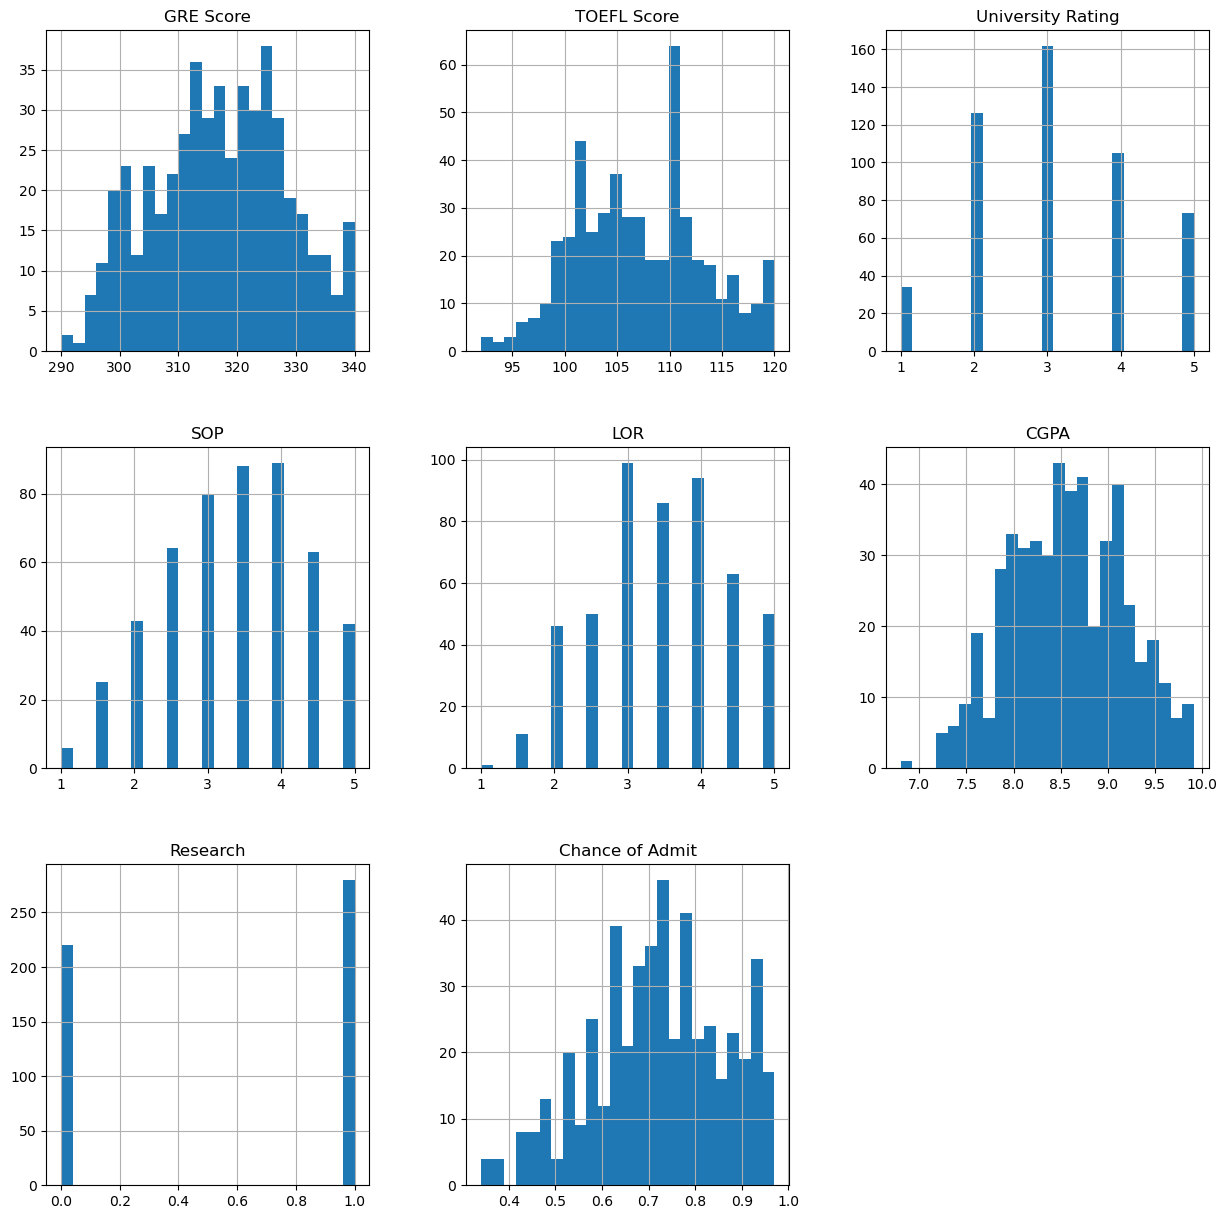

In [44]:
# Hitogramas de las varaibles del dataset
data.hist(bins=25, figsize=(15,15))
plt.show()

In [45]:
# Definición de variables predictoras (X)
X = data.drop(data.columns[-1], axis=1)
# Definición de variable de interés (y)
#y = data[data.columns[-1]]
y = pd.DataFrame(np.array(data.iloc[:,-1]))

In [46]:
# Separación de variables predictoras (X) y variable de interés (y) en set de entrenamiento y test usandola función train_test_split
XTrain, XTest, yTrain, yTest = train_test_split(X,y,test_size=0.3, random_state=22)

## Punto 1 - Red Neuronal de una capa

En la celda 1 creen una **red neuronal de una capa** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes, usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador y el número de épocas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

In [47]:
# librerias

# Normalización de variables predictoras (X) con la función StandardScaler
from sklearn.preprocessing import StandardScaler

from keras.models import Sequential
from keras.layers import Dense, Activation
from livelossplot import PlotLossesKeras
from keras import backend as K
import keras.optimizers as opts
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import initializers
from keras import optimizers
from keras.layers import Dropout

from sklearn import metrics

In [48]:
# Definición de la función StandardScaler
scaler = StandardScaler()
scaler.fit(X)

# Transformación de los set de entrenamiento y test
XTrain = pd.DataFrame(data=scaler.transform(XTrain), columns=XTrain.columns, index=XTrain.index)
XTest = pd.DataFrame(data=scaler.transform(XTest), columns=XTest.columns, index=XTest.index)

XTrain = np.array(XTrain)
yTrain = np.array(yTrain)

XTest = np.array(XTest)
yTest = np.array(yTest)

In [49]:
# Definición de dimensiones de salida, varaibles de interés
output_var = yTrain.shape[1]
print(output_var, ' output variables')

1  output variables


In [50]:
# Definición de dimensiones de entrada, varaibles predictoras
dims = XTrain.shape[1]
print(dims, 'input variables')

7 input variables


In [51]:
K.clear_session()

# Definición red neuronal con la función Sequential()
model = Sequential()
# Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape de dims
model.add(Dense(output_var, input_shape=(dims,)))

# Impresión de la arquitectura de la red neuronal
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 8         
                                                                 
Total params: 8
Trainable params: 8
Non-trainable params: 0
_________________________________________________________________
None


In [52]:
# Definición de función de perdida. Se usa mean_squared_error dado que es un ejercicio de regresión
model.compile(optimizer='sgd', loss='mean_squared_error')

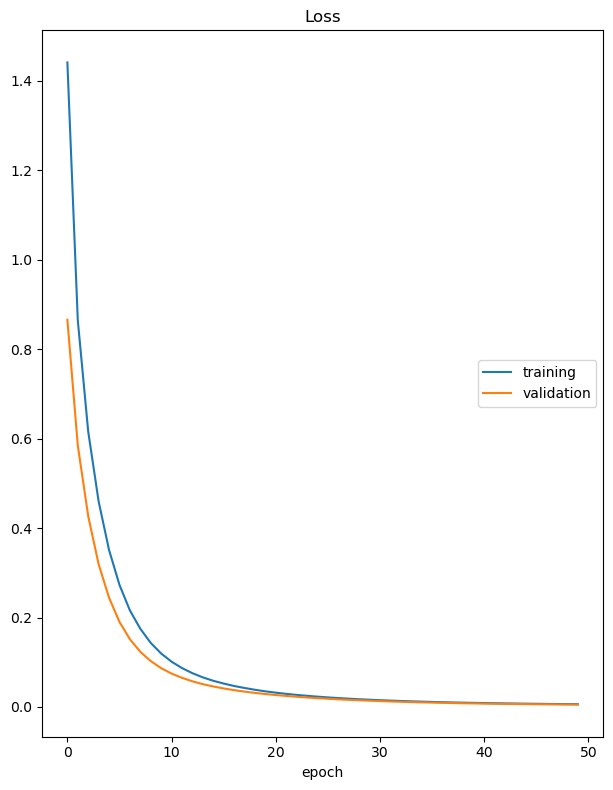

Loss
	training         	 (min:    0.006, max:    1.441, cur:    0.006)
	validation       	 (min:    0.005, max:    0.866, cur:    0.005)
11/11 [==============================] - 0s 34ms/step - loss: 0.0062 - val_loss: 0.0053


In [53]:
# Entrenamiento de la red neuronal con 50 épocas
model.fit(XTrain, yTrain, 
          verbose=1, 
          epochs=50, 
          validation_data=(XTest, yTest),
          callbacks=[PlotLossesKeras()])

In [54]:
yPred=model.predict(XTest)

5/5 [==============================] - 0s 830us/step


In [55]:
# Calculate mae
RNLmae = metrics.mean_absolute_error(yTest, yPred)
print("Mean absolute error RNLmae:" , RNLmae)

Mean absolute error RNLmae: 0.05462883913516998


In [56]:
# Calculate mse
RNLmse = metrics.mean_squared_error(yTest, yPred)
print("Mean squared error RNLmse:" , RNLmse)

Mean squared error RNLmse: 0.0052958606869609945


**Conclusión:** Se realiza pruebas con epoch desde 50 hasta 300, se encuentra que en todas las pruebas el valor del epoch no genera un distanciamiento entre las dos lineas de entrenamiento y validacion. Es por esto que se toma 50 para el entranamiento.

Para la red neuronal de una capa se obtuvieron valores de error absoluto medio (MAE) y error cuadrático medio (MSE) muy bajos (Aprox MAE: 0.06  -  MSE: 0.006 )

## Punto 2 - Red Neuronal multicapa

En la celda 2 creen una **red neuronal con dos capas** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

In [57]:
K.clear_session()

# Definición red neuronal con la función Sequential()
model = Sequential()

# Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape de dims
model.add(Dense(768, input_shape=(dims,),activation='relu'))
model.add(Dense(768,activation='relu'))
model.add(Dense(output_var))
model.add(Activation('relu'))

# Impresión de la arquitectura de la red neuronal
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 768)               6144      
                                                                 
 dense_1 (Dense)             (None, 768)               590592    
                                                                 
 dense_2 (Dense)             (None, 1)                 769       
                                                                 
 activation (Activation)     (None, 1)                 0         
                                                                 
Total params: 597,505
Trainable params: 597,505
Non-trainable params: 0
_________________________________________________________________
None


In [58]:
# Definición de función de perdida. Se usa mean_squared_error dado que es un ejercicio de regresión
model.compile(optimizer='sgd', loss='mean_squared_error')

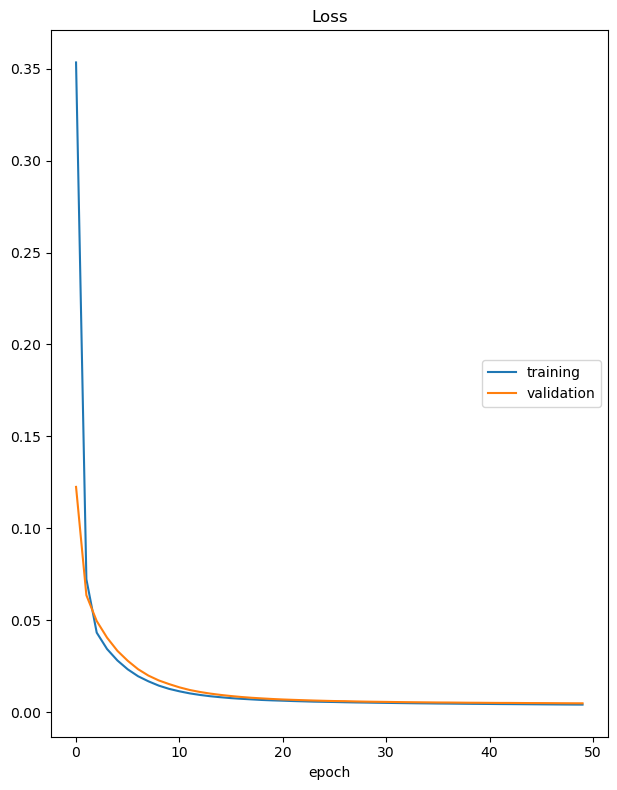

Loss
	training         	 (min:    0.004, max:    0.353, cur:    0.004)
	validation       	 (min:    0.005, max:    0.123, cur:    0.005)
11/11 [==============================] - 0s 29ms/step - loss: 0.0041 - val_loss: 0.0048


In [59]:
# Entrenamiento de la red neuronal con 50 épocas
model.fit(XTrain, yTrain,
          validation_data = (XTest, yTest),
          epochs=50, 
          callbacks=[PlotLossesKeras()])

In [60]:
yPredMl=model.predict(XTest)

5/5 [==============================] - 0s 2ms/step


In [61]:
# Calculate mae
RNMLmae = metrics.mean_absolute_error(yTest, yPredMl)
print("Mean absolute error RNMLmae:" , RNMLmae)

Mean absolute error RNMLmae: 0.05440714993476868


In [62]:
# Calculate mse
RNMLmse = metrics.mean_squared_error(yTest, yPredMl)
print("Mean squared error RNMLmse:" , RNMLmse)

Mean squared error RNMLmse: 0.004825609936064525


**Conclusión:** 

Para el modelo de red neuronal de 2 capas se obtuvieron valores de error absoluto medio (MAE) y error cuadrático medio (MSE)  (Aprox MAE: 0.055  -  MSE: 0.0055 ) menores que los valores del modelo de red neuronal de una capa.

Por lo tanto el modelo de red neuronal de 2 capas tiene un mejor desempeño que el modelo de red neuronal de una capa


## Punto 3  - Red Neuronal multicapa

En la celda 3 creen **una red neuronal con más de una capa con la librería Keras, usando early stopping y dropout,** que prediga la probabilidad de admisión de los estudiantes con los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

In [63]:
K.clear_session()

# Definición red neuronal con la función Sequential()
model = Sequential()

# Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape de dims
model.add(Dense(768, input_shape=(dims,),activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(768,activation='relu'))
model.add(Dense(output_var))
model.add(Activation('relu'))

model.compile(loss='mse', optimizer='adam')

# Impresión de la arquitectura de la red neuronal
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 768)               6144      
                                                                 
 dropout (Dropout)           (None, 768)               0         
                                                                 
 dense_1 (Dense)             (None, 768)               590592    
                                                                 
 dense_2 (Dense)             (None, 1)                 769       
                                                                 
 activation (Activation)     (None, 1)                 0         
                                                                 
Total params: 597,505
Trainable params: 597,505
Non-trainable params: 0
_________________________________________________________________
None


In [64]:
# Definición de la función EarlyStopping para considerar durante el entrenamiento
early_stop = EarlyStopping(monitor='val_loss', patience=4, verbose=1) 

In [65]:
# Definición de la función ModelCheckpoint para guardar el modelo con mejor desempeño
fBestModel = 'best_model.h5'
best_model = ModelCheckpoint(fBestModel, verbose=0, save_best_only=True)

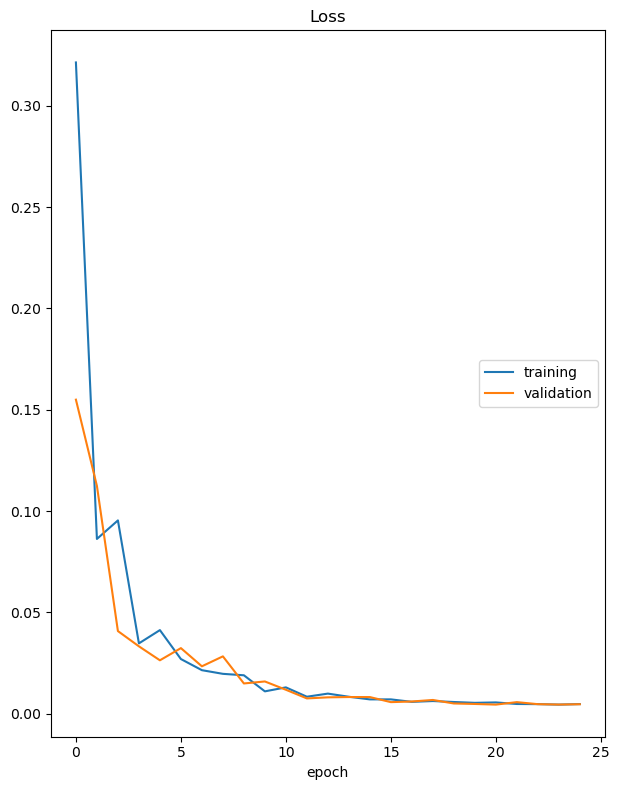

Loss
	training         	 (min:    0.005, max:    0.321, cur:    0.005)
	validation       	 (min:    0.005, max:    0.155, cur:    0.005)
3/3 [==============================] - 0s 148ms/step - loss: 0.0048 - val_loss: 0.0047
Epoch 25: early stopping


In [66]:
# Entrenamiento de la red neuronal con 50 épocas
model.fit(XTrain, yTrain, 
          verbose=True, 
          epochs=50, 
          batch_size=128,
          validation_data=(XTest,yTest),
          callbacks=[best_model, early_stop, PlotLossesKeras()])

In [67]:
yPredMlD=model.predict(XTest)

5/5 [==============================] - 0s 2ms/step


In [68]:
# Calculate mae
RNMLDmae = metrics.mean_absolute_error(yTest, yPredMlD)
print("Mean absolute error RNMLDmae:" , RNMLDmae)

Mean absolute error RNMLDmae: 0.05358568116823832


In [69]:
# Calculate mse
RNMLDmse = metrics.mean_squared_error(yTest, yPredMlD)
print("Mean squared error RNMLDmse:" , RNMLDmse)

Mean squared error RNMLDmse: 0.004689012764548087


**Conclusión:** 

Para el modelo de red neuronal de 2 capas con early stopping y dropout, se obtuvieron valores de error absoluto medio (MAE) y error cuadrático medio (MSE)  (Aprox MAE: 0.05  -  MSE: 0.005 ) muy cercanos y menores a los del modelo de red neuronal de una capa.

Por lo tanto el modelo de red neuronal de 2 capas con early stopping y dropout, tiene un mejor desempeño que el modelo de red neuronal de una capa

## Punto 4 - Comparación y análisis de resultados

En la celda 4 comparen los resultados obtenidos de las diferentes redes y comenten las ventajas del mejor modelo y las desventajas del modelo con el menor desempeño.

In [70]:
# Una capa

# Calculate mae
RNLmae = metrics.mean_absolute_error(yTest, yPred)
print("Mean absolute error RNLmae:" , RNLmae)

# Calculate mse
RNLmse = metrics.mean_squared_error(yTest, yPred)
print("Mean squared error RNLmse:" , RNLmse)


# Multicapa

# Calculate mae
RNMLmae = metrics.mean_absolute_error(yTest, yPredMl)
print("Mean absolute error RNMLmae:" , RNMLmae)

# Calculate mse
RNMLmse = metrics.mean_squared_error(yTest, yPredMl)
print("Mean squared error RNMLmse:" , RNMLmse)


# Con Early Stopper

# Calculate mae
RNMLDmae = metrics.mean_absolute_error(yTest, yPredMlD)
print("Mean absolute error RNMLDmae:" , RNMLDmae)

# Calculate mse
RNMLDmse = metrics.mean_squared_error(yTest, yPredMlD)
print("Mean squared error RNMLDmse:" , RNMLDmse)

Mean absolute error RNLmae: 0.05462883913516998
Mean squared error RNLmse: 0.0052958606869609945
Mean absolute error RNMLmae: 0.05440714993476868
Mean squared error RNMLmse: 0.004825609936064525
Mean absolute error RNMLDmae: 0.05358568116823832
Mean squared error RNMLDmse: 0.004689012764548087


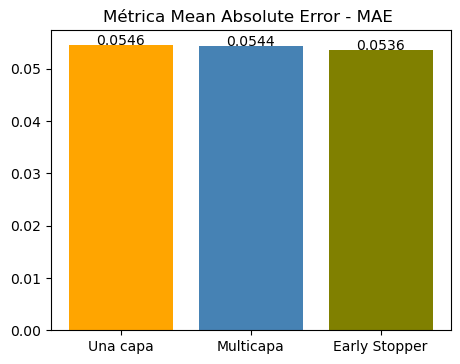

In [71]:
fig = plt.figure(figsize=(4,3))
ax = fig.add_axes([0,0,1,1])
ax.set_title("Métrica Mean Absolute Error - MAE ")
ejeX = ['Una capa','Multicapa', 'Early Stopper']
ejeY = [RNLmae, RNMLmae, RNMLDmae]
ax.bar(ejeX,ejeY)
ax.bar(ejeX,ejeY, color = ['orange', 'steelblue', 'olive', 'crimson'])
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i], '{:.4f}'.format(y[i]), horizontalalignment='center')
addlabels(ejeX,ejeY,plt)
plt.show()

**Conclusión:** 

Teniendo en cuenta los modelos previamente ejecutados, se registra el menor valor de mean absolute error MAE para el modelo early stopper, y el mayor valor para el modelo de una capa

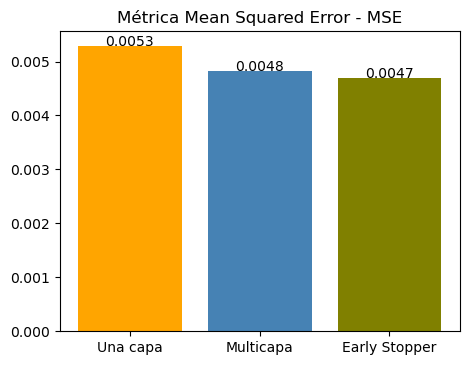

In [72]:
fig = plt.figure(figsize=(4,3))
ax = fig.add_axes([0,0,1,1])
ax.set_title("Métrica Mean Squared Error - MSE")
ejeX = ['Una capa','Multicapa', 'Early Stopper']
ejeY = [RNLmse, RNMLmse, RNMLDmse]
ax.bar(ejeX,ejeY)
ax.bar(ejeX,ejeY, color = ['orange', 'steelblue', 'olive', 'crimson'])
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i], '{:.4f}'.format(y[i]), horizontalalignment='center')
addlabels(ejeX,ejeY,plt)
plt.show()

**Conclusión:** 

Teniendo en cuenta los tres modelos previamente ejecutados ( 1. red neuronal de una capa, 2. red neuronal de dos capas, 3. red neuronal de dos capas con early stopping y dropout), se registran los menores valores de error absoluto medio (MAE) y error cuadrático medio (MSE) en el modelo red neuronal de dos capas con early stopping y dropout. Por otra parte se registran los  mayores valores de MAE y MSE en el modelo de una capa.

Por lo tanto el modelo de red neuronal de 2 capas con early stopping y dropout, tiene el mejor desempeño entre los modelos ejecutados.


.